#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


In [2]:
ls

sample_data/


In [4]:
pwd

'/content'

In [5]:
cd /content/drive/MyDrive/!!LabTest-Model-Deploy

/content/drive/MyDrive/!!LabTest-Model-Deploy


In [6]:
ls

LabTest-65130701932.docx  LabTest-65130701932.ipynb  penguins_size.csv


## Import Packages

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Data

In [8]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [10]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')  # หรือการสร้าง DataFrame ด้วยวิธีอื่น


In [11]:
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [12]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

<ipython-input-12-101aad2f3e67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
<ipython-input-12-101aad2f3e67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])


In [13]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [14]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [15]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [17]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [18]:
X = df.drop('species', axis=1)
y = df['species']

In [19]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load an example dataset (replace this with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline with Random Forest
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalize the data
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest classifier
])

# Fit the pipeline
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## Testing / Evaluation

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     1.0000    1.0000    1.0000        13
           2     1.0000    1.0000    1.0000        13

    accuracy                         1.0000        45
   macro avg     1.0000    1.0000    1.0000        45
weighted avg     1.0000    1.0000    1.0000        45



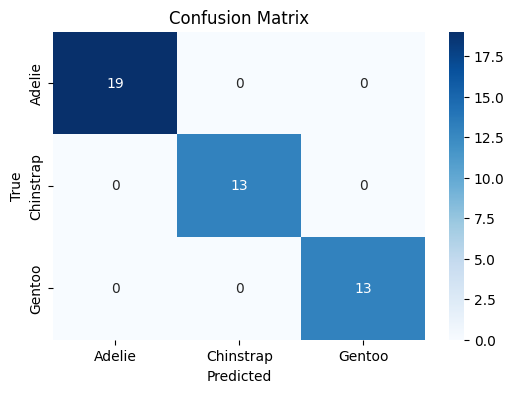

In [21]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_),
            yticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

## Save Model and etc.

In [25]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_65130701932.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [23]:
import pickle
import pandas as pd

In [27]:

with open('model_penguin_65130701932.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [28]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [29]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [31]:
print(x_new.shape)  # ควรแสดง (n_samples, 4) หากคุณใช้ 4 ฟีเจอร์


(1, 6)


In [33]:
x_new = x_new[:1 :4]  # เลือกฟีเจอร์แค่ 4 ตัวแรก


In [35]:
# ตอนฟิต StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [48]:
# เลือกแค่ 4 ฟีเจอร์แรกจาก x_new
x_new = x_new[:1 :4]  # เลือกแค่ 4 ฟีเจอร์แรก

# ทำนายผลด้วยโมเดล
y_pred_new = model.predict(x_new)

# แปลงค่าผลลัพธ์กลับเป็นชนิดของสายพันธุ์
result = species_encoder.inverse_transform(y_pred_new)

# แสดงผล
print('Predicted Specie: ', result)


Predicted Specie:  ['Chinstrap']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [41]:
# เลือกแค่ 4 ฟีเจอร์แรกจาก x_new (ต้องตรงกับฟีเจอร์ที่โมเดลเคยฝึก)
x_new = x_new[:1 :4]  # เลือกแค่ 4 ฟีเจอร์แรกจาก x_new


In [42]:
import pandas as pd

# สมมติว่า X_train เป็น DataFrame ที่มีชื่อฟีเจอร์
X_train = pd.DataFrame(X_train, columns=["feature1", "feature2", "feature3", "feature4"])

# เมื่อทำนายด้วย x_new ที่เป็น DataFrame, ต้องให้ชื่อฟีเจอร์ตรงกับ X_train
x_new = pd.DataFrame(x_new, columns=["feature1", "feature2", "feature3", "feature4"])


In [43]:
y_pred_new = model.predict(x_new)  # ทำการทำนาย
result = species_encoder.inverse_transform(y_pred_new)  # แปลงผลลัพธ์กลับเป็นชื่อสายพันธุ์
print('Predicted Specie: ', result)


Predicted Specie:  ['Chinstrap']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [44]:
# ตรวจสอบขนาดของ x_new
print(x_new.shape)  # ตรวจสอบว่า x_new มี 6 ฟีเจอร์หรือไม่

# เลือกฟีเจอร์ที่ต้องการ (สมมติว่าใช้แค่ 4 ฟีเจอร์แรก)
x_new = x_new[:1 :4]  # เลือกแค่ 4 ฟีเจอร์แรก

# ทำนายผลด้วยโมเดล
y_pred_new = model.predict(x_new)

# แปลงค่าผลลัพธ์กลับเป็นชนิดของสายพันธุ์
result = species_encoder.inverse_transform(y_pred_new)

# แสดงผล
print('Predicted Specie: ', result)


(1, 4)
Predicted Specie:  ['Chinstrap']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [45]:
y_pred_new = model.predict(x_new)

result = species_encoder.inverse_transform(y_pred_new)

print('Predicted Specie: ', result)

Predicted Specie:  ['Chinstrap']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [46]:
%%writefile app_predict_penguin_65130701932.py


#xxxx



Writing app_predict_penguin_65130701932.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [47]:
%%writefile requirements.txt

scikit-learn
pandas


Writing requirements.txt
